<a href="https://colab.research.google.com/github/Aswinramesh04/100-Days-of-DataScience/blob/main/Car_Evaluation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Day99-100 Car Evaluation Model   By: Loga Aswin

In [17]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#load datasets
df = pd.read_csv('/content/car_evaluation.csv')

**Exploratory Data Analysis(EDA):**

In [19]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [20]:
df.shape

(1727, 7)

**Rename column name as it labelled 0,1,2...**

In [21]:
col_names = ['paint', 'break', 'alloy', 'wheel', 'headlight', 'gear', 'engine']
df.columns = col_names
col_names

['paint', 'break', 'alloy', 'wheel', 'headlight', 'gear', 'engine']

In [22]:
df.head()

,paint,break,alloy,wheel,headlight,gear,engine
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [23]:
# Summary
df.info

<bound method DataFrame.info of       paint  break  alloy wheel headlight  gear engine
0     vhigh  vhigh      2     2     small   med  unacc
1     vhigh  vhigh      2     2     small  high  unacc
2     vhigh  vhigh      2     2       med   low  unacc
3     vhigh  vhigh      2     2       med   med  unacc
4     vhigh  vhigh      2     2       med  high  unacc
...     ...    ...    ...   ...       ...   ...    ...
1722    low    low  5more  more       med   med   good
1723    low    low  5more  more       med  high  vgood
1724    low    low  5more  more       big   low  unacc
1725    low    low  5more  more       big   med   good
1726    low    low  5more  more       big  high  vgood

[1727 rows x 7 columns]>

In [24]:
col_names = ['paint', 'break', 'alloy', 'wheel', 'headlight', 'gear', 'engine']

for col in col_names:
  print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: paint, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: break, dtype: int64
3        432
4        432
5more    432
2        431
Name: alloy, dtype: int64
4       576
more    576
2       575
Name: wheel, dtype: int64
med      576
big      576
small    575
Name: headlight, dtype: int64
med     576
high    576
low     575
Name: gear, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: engine, dtype: int64


In [25]:
df['engine'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: engine, dtype: int64

In [26]:
# checking missing values
df.isnull().sum()

paint        0
break        0
alloy        0
wheel        0
headlight    0
gear         0
engine       0
dtype: int64

In [27]:
# target variable
X = df.drop(['engine'],axis=1)
y = df['engine']

In [28]:
# Split into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [29]:
X_train.shape, X_test.shape

((1381, 6), (346, 6))

**Feature Engineering:**

In [30]:
!pip install category_encoders

In [31]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['paint', 'break', 'alloy', 'wheel', 'headlight', 'gear'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [32]:
X_train.head()

,paint,break,alloy,wheel,headlight,gear
107,1,1,1,1,1,1
900,2,2,2,2,1,2
1708,3,3,3,1,2,3
705,4,4,4,1,3,2
678,4,4,2,1,3,2


**RandomForest Classifier Model:**

In [33]:
from sklearn.ensemble import RandomForestClassifier

# classifier
model = RandomForestClassifier(random_state=0)

model.fit(X_train, y_train)

# Predict test results

y_pred = model.predict(X_test)

**Model Evaluation Metrics:**

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9479768786127167


In [35]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[ 73   3   0   1]
 [  3   8   0   4]
 [  3   0 234   0]
 [  4   0   0  13]]


In [36]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         acc       0.88      0.95      0.91        77
        good       0.73      0.53      0.62        15
       unacc       1.00      0.99      0.99       237
       vgood       0.72      0.76      0.74        17

    accuracy                           0.95       346
   macro avg       0.83      0.81      0.82       346
weighted avg       0.95      0.95      0.95       346



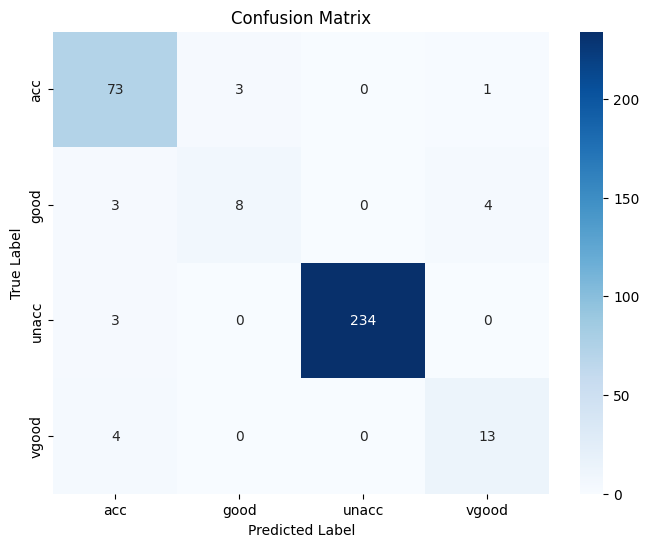

In [37]:
#Confusion Matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()